### Import Packages & Modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm    #color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1: Simple Cost Function

### $$ f(x) = x^2 + x + 1 $$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
#make data
x_1 = np.linspace(start=-3, stop=3, num=100) #linspace creates the num specified values between start and stop

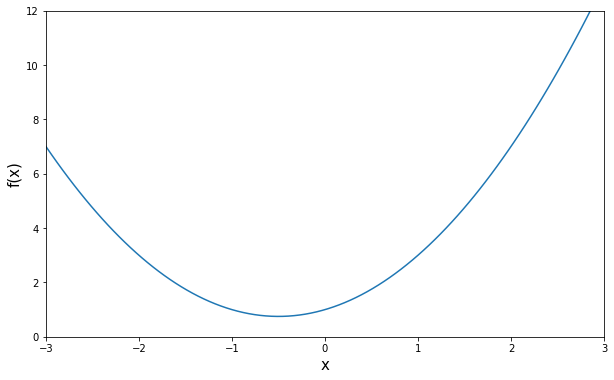

In [5]:
#plot data
plt.figure(figsize=(10,6))

plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(-3,3)
plt.ylim(0,12)

plt.plot(x_1, f(x_1))
plt.show()

## Slopes & Derivatives

In [6]:
def df(x):
    return 2*x + 1

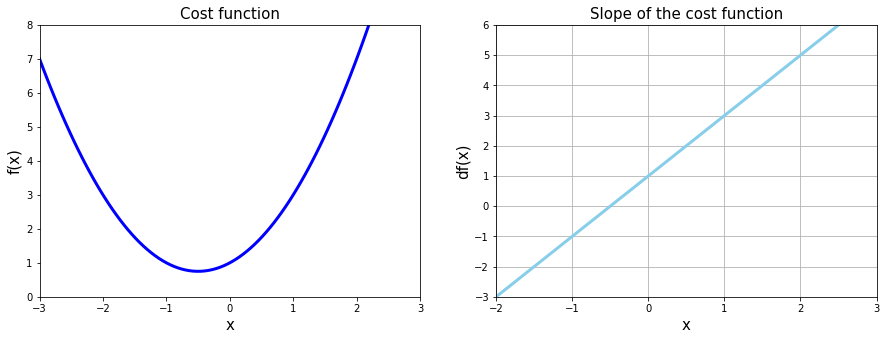

In [7]:
#plot cost function and its derivative side by side
plt.figure(figsize=[15,5])

#plot 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#plot 2: Derivative Function
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)

plt.show()

In [8]:
#Gradient Descent
new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(prev_x - new_x)
    if(step_size < precision):
        print('No of times loop executed is: ', n)
        break

print('Local min occurs at: ', new_x)
print('Slope or df(x) at this point: ', df(new_x))
print('Cost or f(x) value at this point is: ', f(new_x))

No of times loop executed is:  50
Local min occurs at:  -0.49996003706460423
Slope or df(x) at this point:  7.992587079153068e-05
Cost or f(x) value at this point is:  0.7500000015970362


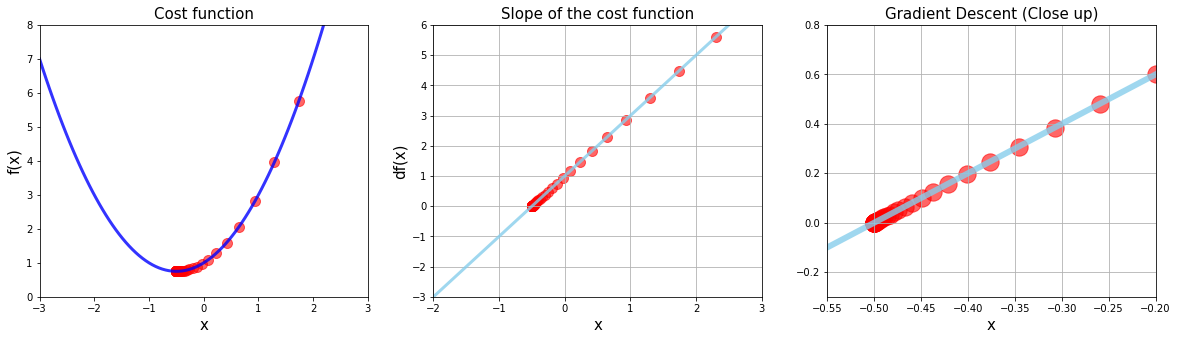

In [9]:
#Adding Gradient Descent data points over the plot
plt.figure(figsize=[20,5])

#plot 1: Cost Function
plt.subplot(1, 3, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#plot 2: Derivative Function
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

#plot 3: Derivative (Close up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (Close up)', fontsize=15)
plt.xlabel('x', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

## Example 2: Multiple Minima vs Initial Guess & Advanced Functions
### $$ g(x) = x^4 - 4x^2 + 5 $$

In [10]:
#make some data
x_2 = np.linspace(-2, 2, 1000)

In [11]:
def g(x):
    return x**4 - 4*x**2 + 5

In [12]:
def dg(x):
    return 4*x**3 - 8*x

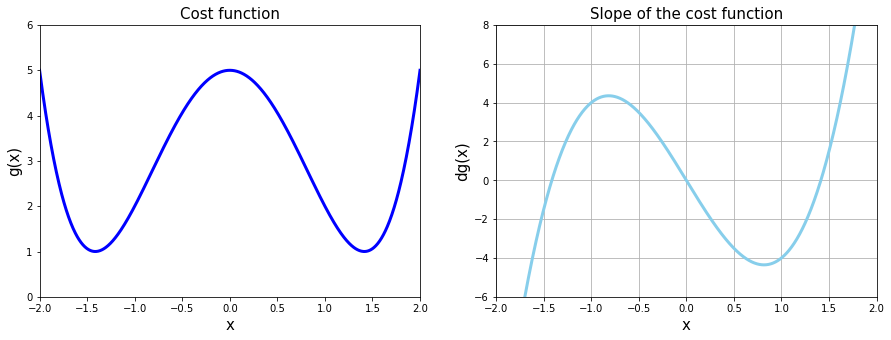

In [13]:
#plot cost function and its derivative side by side
plt.figure(figsize=[15,5])

#plot 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,6)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#plot 2: Derivative Function
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.show()

### Gradient Descent as Python Function

In [14]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    x_list = [initial_guess]
    slope_list = [df(initial_guess)]

    for n in range(max_iter):
        prev_x = initial_guess
        gradient = derivative_func(prev_x)
        initial_guess = prev_x - multiplier * gradient

        x_list.append(initial_guess)
        slope_list.append(derivative_func(initial_guess))

        step_size = abs(prev_x - initial_guess)
        if(step_size < precision):
            break
    return initial_guess, x_list, slope_list


In [15]:
local_min, list_x, deriv_x = gradient_descent(dg, 0.1)

print('Local min occurs at: ', local_min)
print('No of steps are: ', len(list_x))

Local min occurs at:  1.4120887490901561
No of steps are:  34


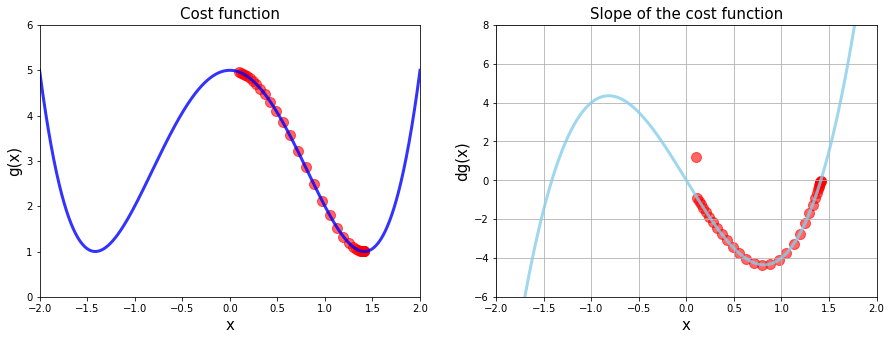

In [16]:
#calling gradient descent function
local_min, list_x, deriv_x = gradient_descent(dg, 0.1)

#plot cost function, its derivative and scatter plot side by side
plt.figure(figsize=[15,5])

#plot 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,6)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), s=100, color='red', alpha=0.6)

#plot 2: Derivative Function
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(list_x, deriv_x, alpha=0.6, s=100, color='red')
plt.show()

Initial guess matters the most in case of gradient descent algo because initial guess tells us which path our algo will follow.

*Gradient descent algorithm stops working once the slope becomes zero i.e. function reaches to its minima.*

Specifically this algorithm is called **Batch Gradient Descent Algorithm**.

## Example 3: Divergence, Overflow & Python Tuples
### $$ h(x) = x^5 - 2x^4 + 2 $$

In [17]:
#make some data
x_3 = np.linspace(-2.5, 2.5, 1000)

In [18]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

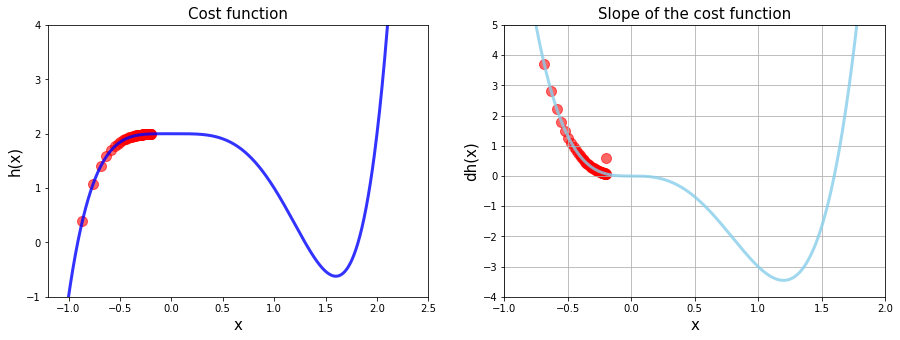

Local minimum occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
No of steps taken:  72


In [19]:
#calling gradient descent function
local_min, list_x, deriv_x = gradient_descent(dh, -0.2, max_iter=71)

#plot cost function, its derivative and scatter plot side by side
plt.figure(figsize=[15,5])

#plot 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('h(x)', fontsize=15)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), s=100, color='red', alpha=0.6)

#plot 2: Derivative Function
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('dh(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(list_x, deriv_x, alpha=0.6, s=100, color='red')
plt.show()

print('Local minimum occurs at: ', local_min)
print('Cost at this minimum is: ',h(local_min))
print('No of steps taken: ', len(list_x))

In [20]:
import sys

sys.float_info.max

1.7976931348623157e+308

## The Learning Rate (Effect of multiplier on Gradient Descent algo)

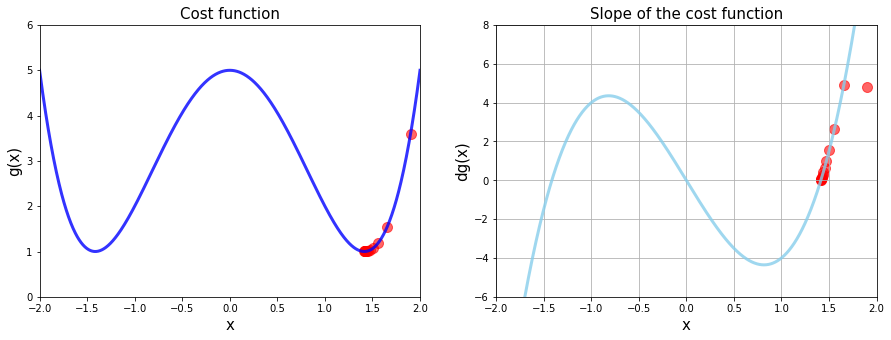

In [21]:
#calling gradient descent function
local_min, list_x, deriv_x = gradient_descent(dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

#plot cost function, its derivative and scatter plot side by side
plt.figure(figsize=[15,5])

#plot 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,6)

plt.title('Cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), s=100, color='red', alpha=0.6)

#plot 2: Derivative Function
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)

plt.grid() #make those transparent lines in the graph

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(list_x, deriv_x, alpha=0.6, s=100, color='red')
plt.show()

When we increase the multiplier beyond a certain limit then our algorithm does not converge at all even in max no. of allowed iterations also.

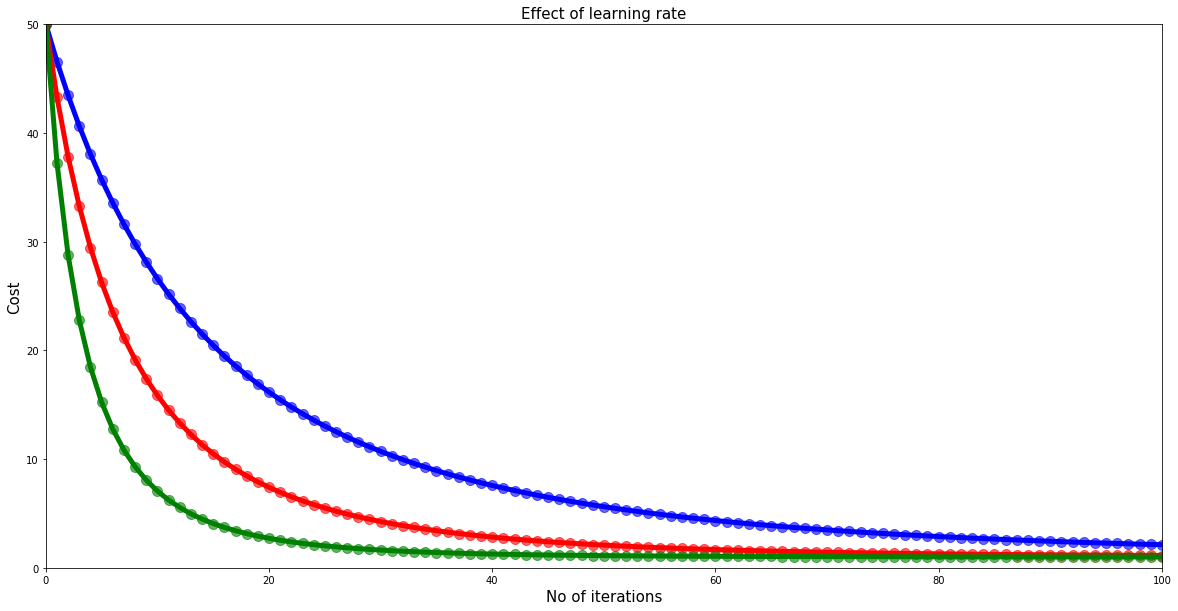

In [22]:
#running gradient descent function 3 times
n=100
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

#plot the reduction of cost on each iteration 
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of learning rate', fontsize=15)
plt.xlabel('No of iterations', fontsize=15)
plt.ylabel('Cost', fontsize=15)

#Values for our chart
low_values = np.array(low_gamma[1])
iteration_list = list(range(0, n+1))

#plotting low learning rate
plt.plot(iteration_list, g(np.array(low_gamma[1])), color='blue', linewidth=5)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), s=100, color='blue', alpha=0.6)

#plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), s=100, color='red', alpha=0.6)

#plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='green', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), s=100, color='green',alpha=0.6)

plt.show()


Higher the multiplier, faster the converging rate and hence high is the learning rate. (learning rate = multiplier)

Increasing the multiplier more than a certain extent will either give you an overflow error or the algorithm will not converge at all.

## Data Visualization with 3D Charts

### Minimize $$ f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [23]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [24]:
#make some data for our x & y 
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X: ', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)  # to convert 1D array to 2D array
print('Array after meshgrid: ', x_4.shape)

Shape of X:  (200,)
Array after meshgrid:  (200, 200)


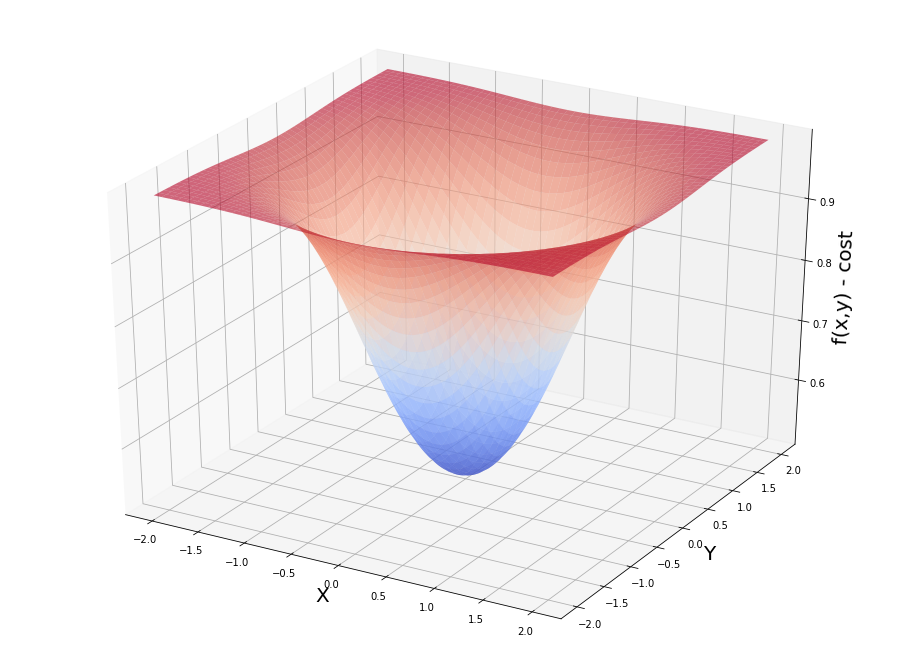

In [25]:
fig = plt.figure(figsize=[16, 12])
axe = fig.gca(projection='3d')

axe.set_xlabel('X', fontsize=20)
axe.set_ylabel('Y', fontsize=20)
axe.set_zlabel('f(x,y) - cost', fontsize=20)

axe.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)

plt.show()

## Partial Derivative and Symbolic Computation

### $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2} $$
### $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2} $$

In [26]:
a, b = symbols('x, y')
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [27]:
diff(f(a, b), a)   #partial derivative of function wrt x

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [28]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [29]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

## Batch Gradient with SymPy

In [30]:
#setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #initial values

for n in range(max_iter):
    #these first two steps consume time in a loop which makes algo slower with sympy
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
print('Values in gradients array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradients array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [31]:
#partial derivative functions
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/(r+1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/(r+1)**2

In [32]:
fpx(1.8, 2.0)

0.0013883022028183059

### Batch Gradient without Sympy (creating our own functions to improve performance)

In [33]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  #initial values

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
print('Values in gradients array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradients array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


Here we define our own partial derivatives functions wrt x & y because for large number of iterations our algorithm will work slowly with sympy but faster with our own functions.

## Graphing 3D Gradient Descent & Advance Numpy Arrays

In [34]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  #initial values
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)
#     values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)     
# both the methods concatenate() and append() do the same things.
    
print('Values in gradients array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradients array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


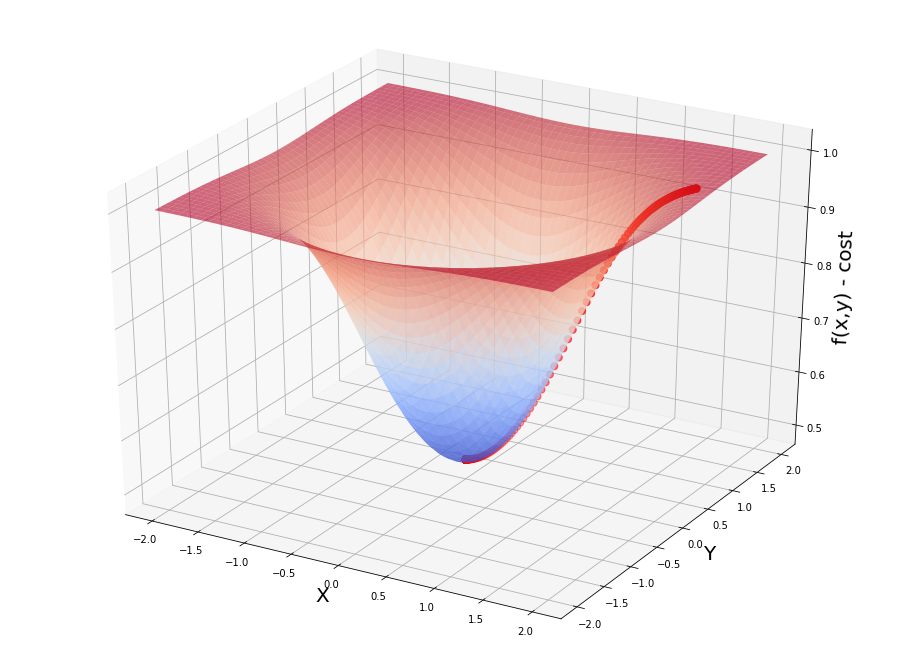

In [35]:
fig = plt.figure(figsize=[16, 12])
axe = fig.gca(projection='3d')

axe.set_xlabel('X', fontsize=20)
axe.set_ylabel('Y', fontsize=20)
axe.set_zlabel('f(x,y) - cost', fontsize=20)

axe.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
axe.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color="red")

plt.show()

## Example 5: Working with data and Real Cost Function
### Mean Squared Error: a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac {1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
$$ or $$
### $$ MSE = \frac {1}{n}\sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$
$$ \hat{y} = predicted  values  of  x $$

In [36]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print("Shape of x_5 array: ", x_5.shape)
print("Shape of y_5 array: ", y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [37]:
#Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)  #fit() always takes 2D matrices as arguements

print("Theta 0: ", regr.intercept_[0])
print("Theta 1: ", regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


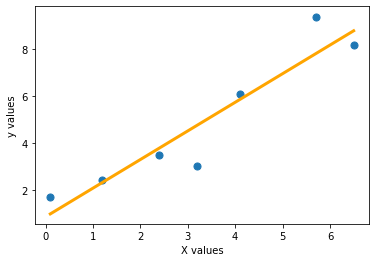

In [38]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color="orange", linewidth=3)

plt.xlabel('X values')
plt.ylabel('y values')

plt.show()

In [39]:
#predicted values of y (y_hat) = theta0 + theta1*x
#theta0 = intercept & theta1 = slope
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Estimated values of y_hat are: \n', y_hat)
print('In comaprison, the orignal valuesof y are: \n', y_5)

Estimated values of y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comaprison, the orignal valuesof y are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [40]:
def mse(y, y_hat):
#     mse_calc = np.average((y - y_hat)**2, axis=0) #axis=0 for avergae of rows only not columns
    mse_calc = (1/y.size) * sum((y - y_hat)**2)
    return mse_calc

In [41]:
print('Manually calculate MSE is: ', mse(y_5, y_hat))
print('MSE by inbuilt sklearn function is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculate MSE is:  [0.94796558]
MSE by inbuilt sklearn function is:  0.9479655759794577
MSE regression is:  0.9479655759794577


### Make data for thetas

In [48]:
no_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=no_thetas)
th_1 = np.linspace(start=-1, stop=3, num=no_thetas)

plot_0, plot_1 = np.meshgrid(th_0, th_1)

### Calculate MSE using nested for loops

In [49]:
plot_cost = np.zeros((no_thetas, no_thetas))

for i in range(no_thetas):
    for j in range(no_thetas):
        y_hat = plot_0[i][j] + plot_1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('The size of all the matrices are: ', plot_cost.shape)

The size of all the matrices are:  (200, 200)


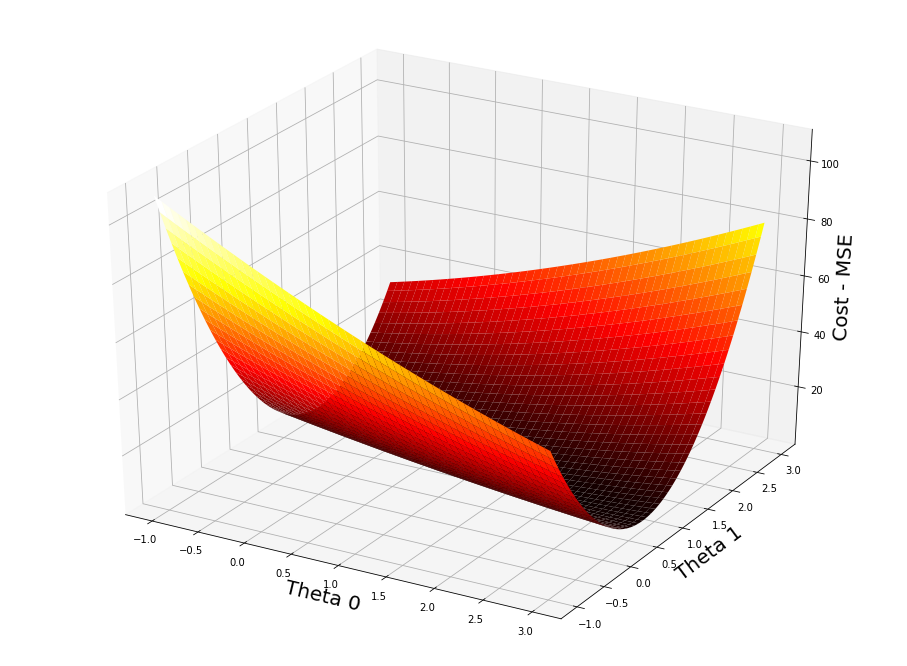

In [51]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_0, plot_1, plot_cost, cmap=cm.hot)
plt.show()

In [54]:
print('Min value of plot_cost ', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j) ', ij_min)
print('Min MSE for theta0 at plot_0[91][111]: ', plot_0[91][111])
print('Min MSE for theta1 at plot_1[91][111]: ', plot_1[91][111])

Min value of plot_cost  0.9483826526747163
Min occurs at (i, j)  (111, 91)
Min MSE for theta0 at plot_0[91][111]:  1.2311557788944723
Min MSE for theta1 at plot_1[91][111]:  0.829145728643216


## Partial Derivative of MSE cost function w.r.t  $ \theta_0 $ & $ \theta_1 $

### $$ \frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)  $$

### $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big) $$

### MSE & Gradient Descent

In [55]:
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [58]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas -= multiplier * grad(x_5, y_5, thetas)
    
    # append the new values to our old numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
    
#results
print('Min occurs at theta 0: ', thetas[0])
print('Min occurs at theta 1: ', thetas[1])
print('MSE is: ', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at theta 0:  0.8532230461743415
Min occurs at theta 1:  1.2214935332607393
MSE is:  [0.94797511]


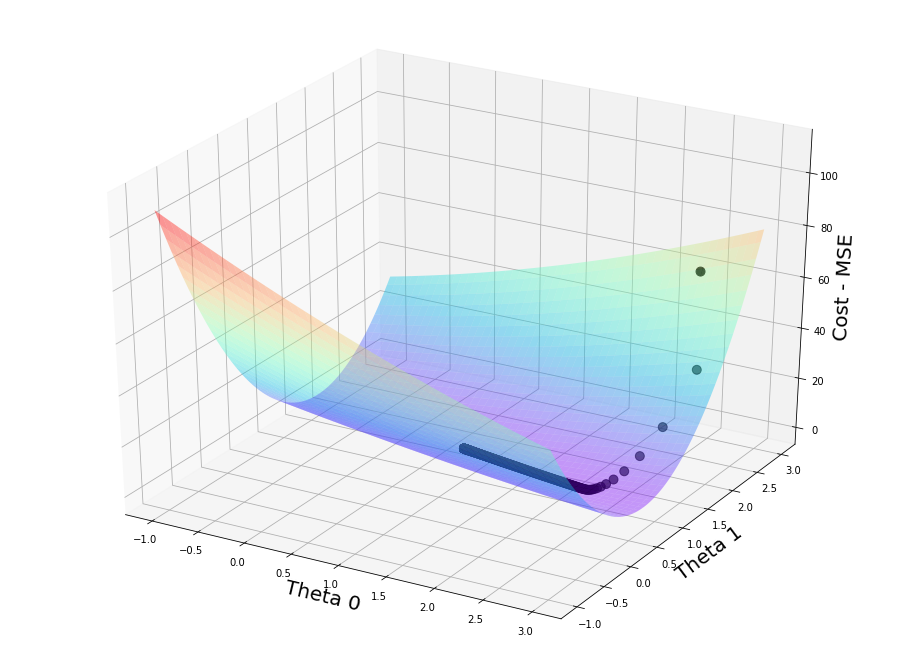

In [61]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_0, plot_1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()